# 6-1. イメージで理解する感染症モデル
## SIR モデル
感染症の予測を行なうための基本となるモデル（微分方程式）。
- Susceptible: 感受性保持者
- Infected: 感染者
- Recovered(or Removed): 免疫保持者（あるいは隔離者）

の頭文字から命名

In [1]:
# 微分方程式の Source-code の構造
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameter設定
dt = 1.0
beta = 0.000003
gamma = 0.1
S = 200000
I = 2
R = 0
alpha = I / (S + I + R)
num = 100

In [3]:
# 初期化（初期値設定）
inf = np.zeros(num)
sus = np.zeros(num)
rec = np.zeros(num)
inf[0] = I
sus[0] = S
rec[0] = R

In [4]:
# 時間発展方式
for t in range(1, num):
    # 時刻 t-1 から t への変化分の計算
    S = sus[t - 1]
    I = inf[t - 1]
    R = rec[t - 1]
    alpha = I / (S + I + R)
    delta_R = I * gamma
    delta_S = -beta * S * I
    if delta_S > 0:
        delta_S = 0
    delta_I = -delta_S - delta_R
    # 時刻 t での値で計算
    I = I + delta_I * dt
    R = R + delta_R * dt
    S = S + delta_S * dt
    if S < 0:
        s = 0
    sus[t] = S
    inf[t] = I
    rec[t] = R

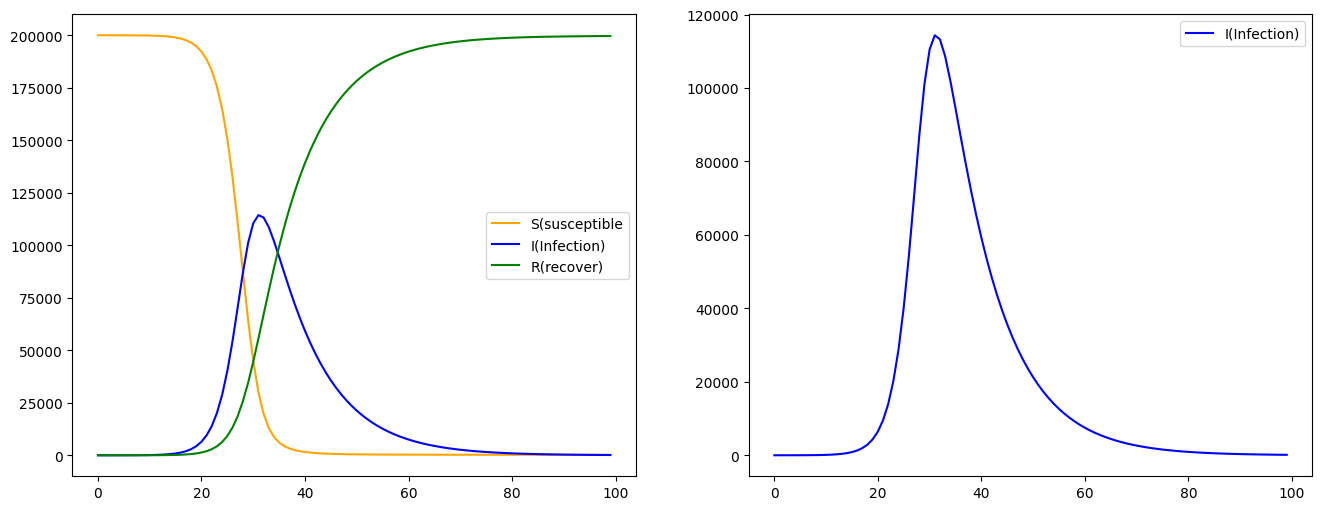

In [5]:
# Graph描画
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(sus, label='S(susceptible', color='orange')
plt.plot(inf, label='I(Infection)', color='blue')
plt.plot(rec, label='R(recover)', color='green')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(inf, label='I(Infection)', color='blue')
plt.legend()

初期値が時間発展方程式に従って for loop で更新していけば、時刻 t の状況が予測できることになる。

SIR-model を元に微分方程式、そして数値シミュレーションを使いこなすまでに至るには、やや複雑。

微分方程式の最も単純なものである **「ねずみ算」** から理解を深めていく。

# 感染症 Model を理解するための「ねずみ算」
## ねずみ算
２匹が４匹に、４匹が８匹に次々に個体数が増えていく微分方程式 Model.

In [6]:
# ねずみ算を実行する Source-code
import numpy as np
import matplotlib.pyplot as plt

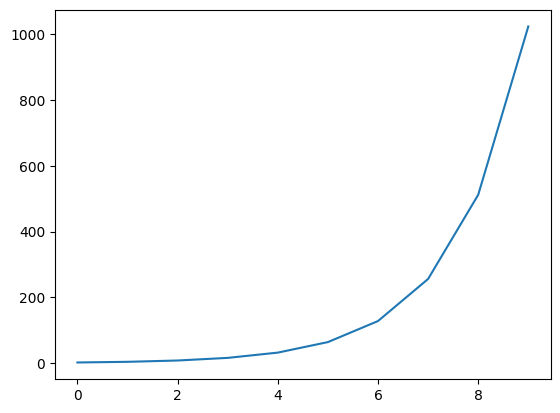

In [7]:
# Parameter設定
dt = 1.0
a = 1.0
num = 10

# 初期化（初期化設定）
n = np.zeros(num)
n[0] = 2.0

# 時間発展方程式
for t in range(1, num):
    delta = a * n[t - 1]
    n[t] = delta * dt + n[t - 1]

# Graph描画
plt.plot(n)
plt.show()

### Data-Visualizatn
数値シミュレーションの結果を Animation を利用して効果的に見せる。

In [8]:
# ねずみ算の Animation を実行する
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Parameter設定
dt = 1.0
a = 1.0
num = 10
x_size = 8.0
y_size = 6.0

# 初期化（初期値設定）
n = np.zeros(num)
n[0] = 2
list_plot = []

# 時間発展方式
fig = plt.figure()

for t in range(1, num):
    delta = a * n[t - 1]
    n[t] = delta * dt + n[t - 1]
    x_n = np.random.rand(int(n[t])) * x_size
    y_n = np.random.rand(int(n[t])) * y_size
    img = plt.scatter(x_n, y_n, color='black')
    list_plot.append([img])

# Graph(Animation)描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc('animation', html='jshtml')
plt.close()
anim

ねずみ算は単純ではあるが、計算結果を Graph にして、Animation にしていくという一連の流れ、つまり数値Simulation の基礎的な流れはすべて含まれている。

## 6-3. ねずみ算の Parameter を変化させ、直感的な理解をしてみよう

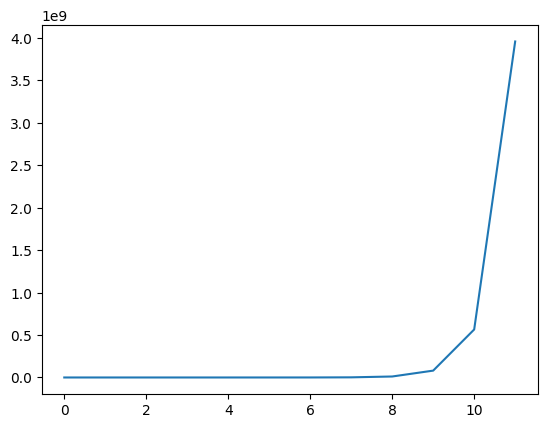

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter設定
dt = 1.0
a =  6.0 # １匹平均６匹の子を宿す
num = 12 # t の単位を１ケ月とし1年間、つまり12ヶ月分

# 初期化
n = np.zeros(num)
n[0] = 2

# 時間発展方程式
for t in range(1, num):
    delta = a * n[t - 1]
    n[t] = delta * dt + n[t - 1]

plt.plot(n)
plt.show()

ねずみ算だけでは、「頭打ち」という現象について説明することができない。
SIR-Model のR(免疫保持者)の Graph も無限に増えていくわけではなく頭打ちを迎え、予測としても不正確になってしまうため発展した方程式が必要になる。